# Synthetic Image Generator Notebook 

This notebook generates synthetic images for the training, validation and testing. The output of this notebook is required by the **Training+Export.ipynb** notebook.

Authors(s): *Martin Fränzl*

## Required packages

In [5]:
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt
%matplotlib inline

import os
import matplotlib.patches as patches

from tqdm import tqdm # Progress bar

from xml_writer import Writer # Writes XML files in the Pascal VOC format 
import image_generator as ig 

## Display single image for parameter adjustments

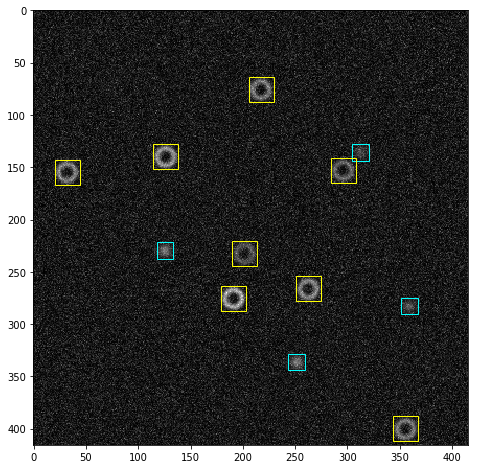

In [6]:
image_w = 416
image_h = 416
n_list = [np.random.randint(1, 20+1), np.random.randint(1, 10+1)]
label_list = ['Spot', 'Ring']
parameters_list = [[0, 4], [0, 8, 2]] 
color_list = ['cyan', 'yellow']
snr = 0

objects = ig.getRandom(1, n_list, image_w=image_w, image_h=image_h, distance=10, offset=15, label_list=label_list, parameters_list=parameters_list)[0]
                    
bboxes, labels, image = ig.generateImage(objects, image_w, image_h, snr=snr, a_range=[0.1, 1])

fig = plt.figure(figsize=(8,8))
plt.imshow(image, cmap='gray')
ax = fig.gca()
for bbox, label in zip(bboxes, labels):
    x, y = bbox[0]
    x1, y1 = bbox[1]
    ax.add_patch(patches.Rectangle((x,y), x1-x, y1-y, linewidth=1, edgecolor=color_list[np.where(np.array(label_list) == label)[0][0]], facecolor='none'))

## Generate images for training, validation and testing

In [7]:
snr = 0
subdir = 'images/'
nimages = [1000, 200, 10]
folders = ['train', 'valid', 'test']

if not os.path.exists(subdir):
    os.mkdir(subdir)
for i, prefix in enumerate(folders):

    i_dir = subdir + '/' + prefix + '_images/'
    if not os.path.exists(i_dir):
        os.mkdir(i_dir)
    a_dir = subdir + '/' + prefix + '_annotations/'
    if not os.path.exists(a_dir):
        os.mkdir(a_dir)
        
    for i in tqdm(range(nimages[i])):
        objects = ig.getRandom(1, [np.random.randint(1, 20+1), np.random.randint(1, 10+1)], image_w=image_w, image_h=image_h, distance=10, offset=15, label_list=label_list, parameters_list=parameters_list)[0]
        bboxes, labels, image = ig.generateImage(objects, image_w, image_h, snr=snr, a_range=[0.1, 1]) 
        fname = i_dir + 'image_{:04d}.jpg'.format(i,2)
        plt.imsave(fname, image, cmap='gray')
        writer = Writer(fname, image_w, image_h)
        for bbox, label in zip(bboxes, labels):
            x, y = bbox[0]
            x1, y1 = bbox[1]
            writer.addObject(label, x, y, x1, y1)
        xmlname = a_dir + 'image_{:04d}.xml'.format(i,2)    
        writer.save(xmlname)

100%|██████████████████████████████████████████| 10/10 [00:02<00:00,  4.10it/s]


In [ ]:
,